## This Code to detect the color of the printing pattern on the back-face of the syringe pack.
## Black color is rejected 
## Blue color is accepted

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import cv2, os
import tensorflow as tf


In [2]:
img= cv2.imread("370.bmp",3)

cv2.imshow("Syringe_Back_Pattern",img)
cv2.waitKey(1500)
cv2.destroyAllWindows()

In [3]:
img.shape

(883, 849, 3)

In [4]:
os.mkdir("CV_Good_Bad_Syringes_Back")

In [5]:
train_dir = "E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Training\\Back"
test_dir = "E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Back"

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1/255, validation_split=0.2)

train_generator= train_datagen.flow_from_directory(train_dir,target_size=(50,50,3),color_mode="grayscale", class_mode="binary", subset="training")
validation_generator= train_datagen.flow_from_directory(train_dir,target_size=(50,50,3),color_mode="grayscale", class_mode="binary",subset="validation")


Found 224 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = tf.keras.models.Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape=(50,50,3),padding = "same"))
model.add(MaxPooling2D(pool_size= (2,2), padding="same"))

model.add(Conv2D(64, kernel_size = (3,3), activation = "relu", input_shape=(50,50,3),padding = "same"))
model.add(MaxPooling2D(pool_size= (2,2), padding="same"))

model.add(Conv2D(128, kernel_size = (3,3), activation = "relu", input_shape=(50,50,3),padding = "same"))
model.add(MaxPooling2D(pool_size= (2,2), padding="same"))

model.add(Conv2D(128, kernel_size = (3,3), activation = "relu", input_shape=(50,50,3),padding = "same"))
model.add(MaxPooling2D(pool_size= (2,2), padding="same"))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))

model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [7]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history= model.fit_generator(train_generator, epochs=10,validation_data=validation_generator, validation_steps=len(validation_generator))

C:\Users\Alaswad\AppData\Local\Temp\ipykernel_2940\1145406684.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(train_generator, epochs=10,validation_data=validation_generator, validation_steps=len(validation_generator))


ValueError: could not broadcast input array from shape (50,50,1) into shape (50,50,3,1)

1/1 [==============================] - 1s 517ms/step
Confidence : [[50.515408]]%
Bad Printing


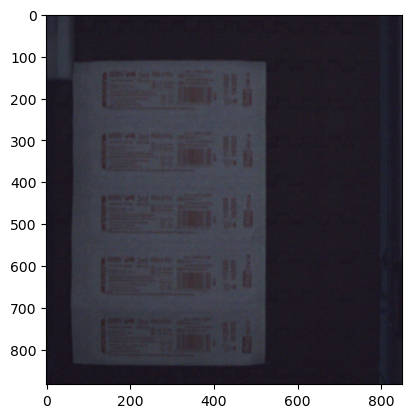

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

def pred(path):
    image =cv2.imread(path,3)
    plt.imshow(image)

    image= cv2.resize(image, (50,50))
    img= img_to_array(image)
    img= img/255
    batch_img = np.expand_dims(img, axis=0)
    return batch_img


p= pred("E:\\Local Disk D_3192023833\\Private\\Programming\\AMIT\\AI and ML Diploma\\Python\\Sessions\\Good_Bad_Syringes_Separate_Folders\\Camera2\\Testing\\Back\\417.bmp") # Good

cls= model.predict(p)
print(f"Confidence : {cls*100}%")

if cls >0.9:
    print("Good Printing")
else:
    print("Bad Printing")